In [1]:
!pip install dash
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.3 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving supply_chain_data.csv to supply_chain_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Load dataset
df = pd.read_csv("supply_chain_data.csv")


In [19]:
#  SUPPLY CHAIN THEME COLORS
scm_pastel = ["#AEC6CF",  # Pastel Blue (logistics)
              "#77DD77",  # Pastel Green (transport)
              "#FFB347",  # Pastel Orange (cargo/stock)
              "#CFCFC4",  # Pastel Gray (warehouse)
              "#CBAACB",  # Pastel Purple (manufacturing)
              "#FDFD96",  # Pastel Yellow (finance/inventory)
              "#FFD1DC"]  # Pastel Pink (miscellaneous)


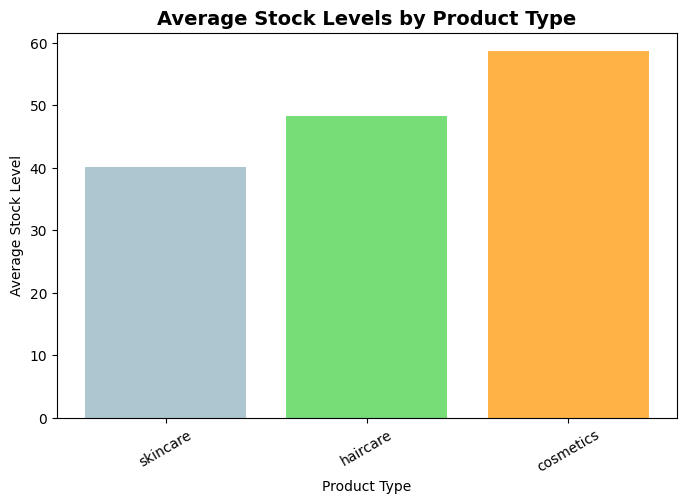

In [21]:
# ---------- 1. Bar Chart: Average Stock Levels by Product Type ----------
stock_levels = df.groupby("Product type")["Stock levels"].mean().sort_values()
plt.figure(figsize=(8,5))
plt.bar(stock_levels.index, stock_levels.values,
        color=scm_pastel[:len(stock_levels)])
plt.title("Average Stock Levels by Product Type", fontsize=14, fontweight="bold")
plt.xlabel("Product Type")
plt.ylabel("Average Stock Level")
plt.xticks(rotation=30)
plt.show()

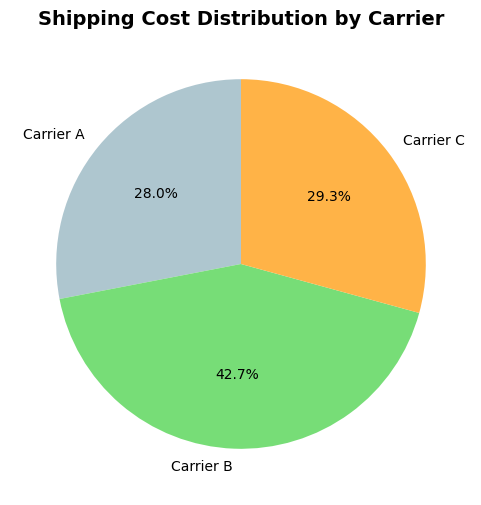

In [22]:
# ---------- 2. Pie Chart: Distribution of Shipping Costs by Carrier ----------
shipping_costs = df.groupby("Shipping carriers")["Shipping costs"].sum()
plt.figure(figsize=(6,6))
plt.pie(shipping_costs, labels=shipping_costs.index, autopct="%1.1f%%",
        colors=scm_pastel[:len(shipping_costs)], startangle=90)
plt.title("Shipping Cost Distribution by Carrier", fontsize=14, fontweight="bold")
plt.show()

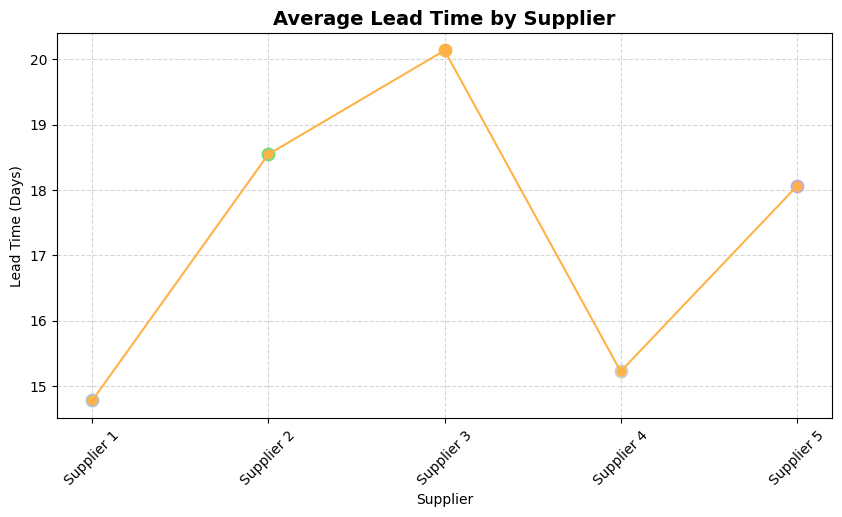

In [23]:
# Lead Time Trend by Supplier
supplier_lead = df.groupby("Supplier name")["Lead time"].mean()
plt.figure(figsize=(10,5))
plt.plot(supplier_lead.index, supplier_lead.values, marker="o", linestyle="-",
         color="#FFB347")
# Add pastel-colored markers for each supplier
for i, val in enumerate(supplier_lead.values):
    plt.scatter(supplier_lead.index[i], val, color=scm_pastel[i % len(scm_pastel)], s=80)
plt.title("Average Lead Time by Supplier", fontsize=14, fontweight="bold")
plt.xlabel("Supplier")
plt.ylabel("Lead Time (Days)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

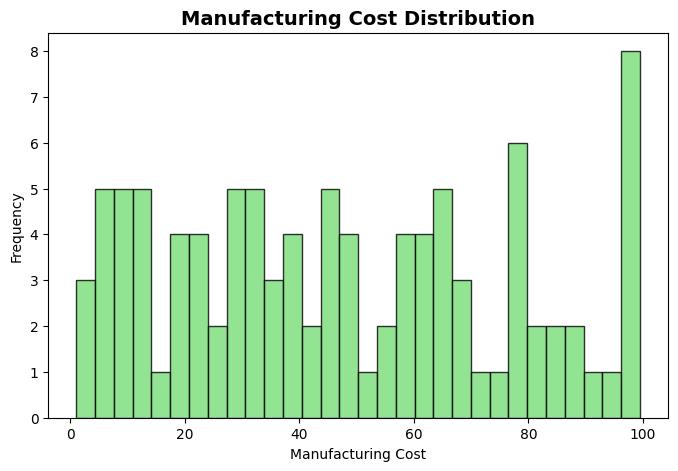

In [24]:
#Distribution of Manufacturing Costs
plt.figure(figsize=(8,5))
plt.hist(df["Manufacturing costs"], bins=30,
         color="#77DD77", edgecolor="black", alpha=0.8)  # Pastel Green
plt.title("Manufacturing Cost Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Manufacturing Cost")
plt.ylabel("Frequency")
plt.show()

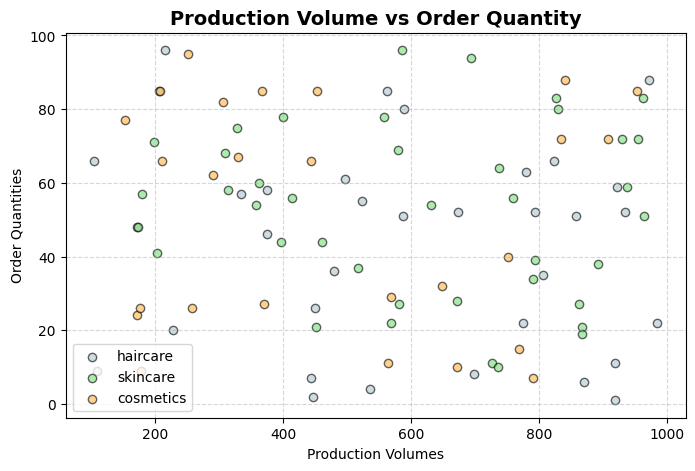

In [26]:
#  Production Volume vs Order Quantity
plt.figure(figsize=(8,5))
for i, prod_type in enumerate(df["Product type"].unique()):
    subset = df[df["Product type"] == prod_type]
    plt.scatter(subset["Production volumes"], subset["Order quantities"],
                alpha=0.6, c=scm_pastel[i % len(scm_pastel)], label=prod_type, edgecolors="black")
plt.title("Production Volume vs Order Quantity", fontsize=14, fontweight="bold")
plt.xlabel("Production Volumes")
plt.ylabel("Order Quantities")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

/tmp/ipython-input-1784497881.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[df["Location"]==loc]["Revenue generated"] for loc in locations],


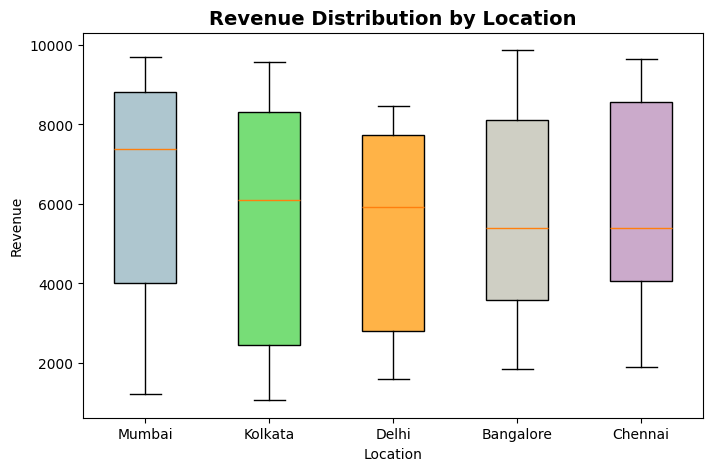

In [27]:
#  Revenue Distribution by Location
plt.figure(figsize=(8,5))
locations = df["Location"].unique()
box = plt.boxplot([df[df["Location"]==loc]["Revenue generated"] for loc in locations],
                  labels=locations, patch_artist=True)

# Assign pastel colors for each location
for patch, color in zip(box["boxes"], scm_pastel):
    patch.set_facecolor(color)

plt.title("Revenue Distribution by Location", fontsize=14, fontweight="bold")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.show()